<a href="https://colab.research.google.com/github/joyfulspace/ADP/blob/master/06_%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D_3_ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/joyfulspace/ADP.git

Cloning into 'ADP'...
remote: Enumerating objects: 2586, done.
remote: Counting objects: 100% (449/449), done.
remote: Compressing objects: 100% (257/257), done.
remote: Total 2586 (delta 196), reused 425 (delta 183), pack-reused 2137
Receiving objects: 100% (2586/2586), 58.91 MiB | 31.27 MiB/s, done.
Resolving deltas: 100% (200/200), done.


# 분산분석 ANOVA
- 두 개이상의 집단에서 그룹 평균 간 차이를 그룹 내 변동에 비교하여 살펴보는 데이터 분석방법
- 여러 그룹간의 평균의 차이가 통계적으로 유의미한지 판단하기 위한 시험법  
- One-way ANOVA(일원배치 분산분석)
  - 반응값에 대해 하나의 범주형 변수의 영향을 알아보기 위해 사용되는 검증방법
  - 한가지 변수의 변화가 결과 변수에 미치는 영향을 보기 위해 사용
- Two-way ANOVA
  - 두개의 요인의 효과를 분석
  - 귀무가설/대립가설: 독립요인을 A, B, 종속변수를 C라고 할 때, 
    1) A그룹들의 평균은 동일하다./적어도 한 개의 A그룹의 평균은 다르다. 
    2) B그룹들의 평균은 동일하다./B그룹의 평균은 다르다. 
    3) A와 B 사이의 상호작용이 없다./A와 B사이의 상호작용이 있다.
- 한계
  1. 두 그룹의 평균 간에 유의한 차이가 있는지 여부는 알 수 있지만 어떤 쌍에서 평균이 다른지는 설명 못 함
  2. 평균만 비교하기 때문에 데이터 세트가 균일하게 분포한다 가정. 데이터가 정규 분포가 아니거나 특이치가 있으면 적합하지 않음
  3. 표준 편차가 그룹간에 동일하거나 유사하다고 가정. 표준편차에 큰 차이가 있으면 검정의 결론이 정확하지 않을 수 있음
  
[출처] https://www.tibco.com/ko/reference-center/what-is-analysis-of-variance-anova#:~:text=%EB%B6%84%EC%82%B0%20%EB%B6%84%EC%84%9D%20(%20ANOVA%20)%EC%9D%80%20%EC%84%9C%EB%A1%9C,%EC%B0%A8%EC%9D%B4%EA%B0%80%20%EC%9E%88%EB%8A%94%EC%A7%80%20%ED%99%95%EC%9D%B8%ED%95%A9%EB%8B%88%EB%8B%A4.



### Anova 가정

* 독립변인/독립변수의 그룹 군은 서로 독립
* 독립변인에 대한 종속변인은 정규분포
* 독립변인에 따른 종속변인의 분산은 등분산

In [10]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

#Graph에 한글을 표시하기 위한 코드
import matplotlib
from matplotlib import font_manager, rc
import platform
font_name = font_manager.FontProperties(fname="ADP/file/malgun.ttf").get_name()
#font_name = font_manager.FontProperties(fname="/usr/share/fonts/NanumGothicCoding.ttf").get_name()
rc('font', family=font_name)\
    
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
#원본데이터와 인터넷에서 찾은 데이터가 양식이 달라 맞추기
df = pd.read_csv('ADP/data/FIFA.csv')
df = df[['sofifa_id', 'short_name', 'age', 'nationality', 'overall', 'club', 'preferred_foot', 'work_rate', 'team_position', 'team_jersey_number',	
         'contract_valid_until', 'height_cm', 'weight_kg', 'release_clause_eur', 'value_eur', 'wage_eur']]
df = df.dropna()
df['team_jersey_number'] = df['team_jersey_number'].astype(int)
df['contract_valid_until'] = df['contract_valid_until'].astype(int)
df['release_clause_eur'] = (df['release_clause_eur']/1000).astype(int)
df['value_eur'] = (df['value_eur']/1000).astype(int)
df['wage_eur'] = (df['wage_eur']/1000).astype(int)

df.columns = ['ID',	'Name',	'Age',	'Nationality',	'Overall',	'Club',	'Preferred_Foot',	'Work_Rate',	'Position',	'Jersey_Number',
              'Contract_Valid_Until',	'Height',	'Weight_lb',	'Release_Clause',	'Value',	'Wage']
print(df.shape)
df.head()

(16980, 16)


,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage
0,158023,L. Messi,32,Argentina,94,FC Barcelona,Left,Medium/Low,RW,10,2021,170,72,195800,95500,565
1,20801,Cristiano Ronaldo,34,Portugal,93,Juventus,Right,High/Low,LW,7,2022,187,83,96500,58500,405
2,190871,Neymar Jr,27,Brazil,92,Paris Saint-Germain,Right,High/Medium,CAM,10,2022,175,68,195200,105500,290
3,200389,J. Oblak,26,Slovenia,91,Atlético Madrid,Right,Medium/Medium,GK,13,2023,188,87,164700,77500,125
4,183277,E. Hazard,28,Belgium,91,Real Madrid,Right,High/Medium,LW,7,2024,175,74,184500,90000,470


### 데이터 범주화
- ANOVA의 독립변수는 항상 class형

In [5]:
foward = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW']
mid = ['LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM']
defender = ['LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
gk = ['GK']

In [6]:
df.loc[df['Position'].isin(foward) , 'Position_Class'] = 'Forward'
df.loc[df['Position'].isin(mid) , 'Position_Class'] = 'Midfielder'
df.loc[df['Position'].isin(defender) , 'Position_Class'] = 'Defender'
df.loc[df['Position'].isin(gk) , 'Position_Class'] = 'GoalKeeper'

In [7]:
df['Position_Class'] = df['Position_Class'].astype('category')

## anova 분석 실행

In [8]:
df.groupby('Position_Class')['Value'].mean()

Position_Class
Defender      3134.022734
Forward       5644.000892
GoalKeeper    3808.059581
Midfielder    4304.445607
Name: Value, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


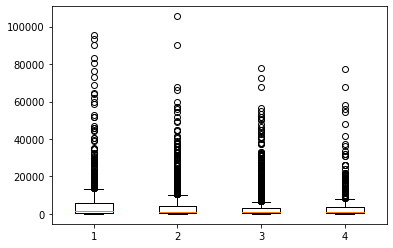

In [11]:
plot_data = [df.loc[df['Position_Class']=='Forward', 'Value'], df.loc[df['Position_Class']=='Midfielder', 'Value'],
             df.loc[df['Position_Class']=='Defender', 'Value'], df.loc[df['Position_Class']=='GoalKeeper', 'Value']]
plt.boxplot(plot_data)
plt.show()

### 일원분산분석
- 독립변수 1개

In [12]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('Value ~ C(Position_Class)', df).fit() # Position_Class에 따라 Value의 평균 차이가 있는지
print(anova_lm(model))

                       df        sum_sq       mean_sq          F        PR(>F)
C(Position_Class)     3.0  5.576891e+09  1.858964e+09  31.388968  3.822585e-20
Residual           6817.0  4.037264e+11  5.922347e+07        NaN           NaN


### 사후 검정
* 분산분석의 결과 귀무가설이 기각되어 적어도 한 집단에서 평균의 차이가 있음이 통계적으로 증명되었을 경우, 어떤 집단들에 대해서 평균의 차이가 존재하는지를 알아보기 위해 실시.
* 던칸의 MRT, 피셔의 최소유의차(LSD), 봉페로니 교정, 튜키의 HSD, Scheffe(셰페) 방법
* 조합 가능한 모든 쌍에 대해 비교를 하므로 과잉검증으로 인한 FWER 증가
  - FWER: Familywise Error Rate. 여러 개의 가설 검정을 할 때 적어도 하나의 가설에서 1종 오류가 발생할 가능성. 가설검정을 많이 할수록 FWER 증가.

[참조] https://mindscale.kr/course/basic-stat-python/22/

* 봉페로니 교정과 투기의 HSD 실습

In [20]:
df['Position_Value'] = df.Position_Class.replace({'Forward':1, 'Midfielder':2, 'Defender':3, 'GoalKeeper':4})

In [27]:
# 준비
#df = pd.read_csv('PlantGrowth.csv')
from statsmodels.sandbox.stats.multicomp import MultiComparison
import scipy.stats

comp = MultiComparison(df['Value'], df['Position_Value'])

###봉페로니 교정
- Bonferroni correction
- 모든 집단을 짝지어 t-test
- 짝지어 비교를 3번하면, p값을 3배
- FWER이 중간 정도

In [28]:
result = comp.allpairtest(scipy.stats.ttest_ind, method='bonf')

In [29]:
result[0]

group1,group2,stat,pval,pval_corr,reject
1.0,2.0,3.9437,0.0001,0.0008,True
1.0,3.0,9.5683,0.0,0.0,True
1.0,4.0,3.7221,0.0002,0.002,True
1.0,nan,nan,nan,nan,False
2.0,3.0,5.9458,0.0,0.0,True
2.0,4.0,1.3536,0.176,1.0,False
2.0,nan,nan,nan,nan,False
3.0,4.0,-2.3881,0.017,0.1698,False
3.0,nan,nan,nan,nan,False
4.0,nan,nan,nan,nan,False


* (1, 2), (1, 3), (1, 4), (2, 3) 수준 간의 평균 차이만 유의미함
* Forward(1)는 Midfielder(2), Defender(3), GoalKeeper(4)의 Value와 차이가 있고, Midfielder(2)는 Defender(3)와 Value의 유의차가 존재함

### 투키의 HSD
- Tuckey's Honestly Significant Difference
- FWER이 중간 정도

In [31]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

hsd = pairwise_tukeyhsd(df['Value'], df['Position_Value'], alpha=0.05)
hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1.0,2.0,-1339.5553,0.001,-1911.1376,-767.9729,True
1.0,3.0,-2509.9782,0.001,-3038.0462,-1981.9101,True
1.0,4.0,-1835.9413,0.001,-2596.031,-1075.8516,True
1.0,nan,-4051.197,0.001,-4529.4036,-3572.9903,True
2.0,3.0,-1170.4229,0.001,-1610.4814,-730.3643,True
2.0,4.0,-496.386,0.3017,-1198.1922,205.4202,False
2.0,nan,-2711.6417,0.001,-3090.4256,-2332.8577,True
3.0,4.0,674.0368,0.0461,7.1924,1340.8813,True
3.0,nan,-1541.2188,0.001,-1850.4546,-1231.983,True
4.0,nan,-2215.2557,0.001,-2843.3537,-1587.1576,True


* (Midfielder, GoalKeeper) 외의 모든 조합에서 통계적으로 유의한 차이가 있다.
* meandiff는 group1과 group2 간의 반응값 차이를 나타내는데, 양수면 group2의 평균이 더 높다.

ANOVA 결과, p-value는 0.05보다 작아 귀무가설을 기각할 수 있고, 포지션별 시장가치는 동일하지 않다. 즉, 포지션의 변화는 시장가치에 영향을 준다. 포지션별 시장가치의 평균값들 중 적어도 한 포지션은 통계적으로 유의한 차이가 있다고 말할 수 있다. 분산분석 SSA의 자유도는 3(집단의 수 - 1 = 4 - 1), SST의 자유도는 6817(관측값의 수 - 집단의 수 = 6821 - 4)이다.  
귀무가설을 '집단들 간의 평균값은 같다', 대립가설을 '집단들 간의 평균값은 같지 않다.'로 두고 사후검정을 진행한다. 모든 집단은 두 집단씩 짝을 지어 각각 비교한다.  
봉페로니 교정 결과, (Forward,Midfielder), (Forward,Defender), (Forward,GoalKeeper), (Midfielder, Defender) 조합의 시장가치 평균에 통계적으로 차이가 난다.  
투키의 HSD 결과, (Midfielder, GoalKeeper) 조합을 제외한 모든 p-value가 0.05보다 작으므로 시장가치 평균에 통계적으로 차이가 있다. 또한 시장가치 평균에 차이가 있는 조합 중 (Defender, GoalKeeper) 외의 모든 조합의 meandiff가 음수이므로 group1의 시장가치 평균이 더 크다. 

### 이원분산분석

In [13]:
model2 = ols('Value ~ C(Preferred_Foot)*C(Position_Class)', df).fit()

print(anova_lm(model2))

                                         df        sum_sq       mean_sq  \
C(Preferred_Foot)                       1.0  1.884403e+07  1.884403e+07   
C(Position_Class)                       3.0  5.675122e+09  1.891707e+09   
C(Preferred_Foot):C(Position_Class)     3.0  1.327881e+09  4.426271e+08   
Residual                             6813.0  4.022815e+11  5.904616e+07   

                                             F        PR(>F)  
C(Preferred_Foot)                     0.319141  5.721431e-01  
C(Position_Class)                    32.037770  1.478739e-20  
C(Preferred_Foot):C(Position_Class)   7.496289  5.248802e-05  
Residual                                   NaN           NaN  


Position_Class의 p-value가 0.0000이므로 귀무가설을 기각하여 통계적으로 평균 차이가 유의미하다. 다만, Preferred_Foot의 p-value는 0.5721로 0.05보다 커 평균 차이가 유의미하지 않다. 반면, Preferred_Foot 변수와 Position_Class 변수 간에는 상호작용이 있다.